In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02,bfunc03s

In [3]:
reg = 'Car'
line = 'CarC'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

17.88722171455478

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
table = sosflog(data,0.2,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       345.0    10.872078    3.529744     0.211978     8.192622    11.392091   
1       545.0    20.976893    2.615857    15.874459    18.865308    21.296704   
2      1537.0    32.641318    4.175150    25.128815    29.145202    32.649176   
3      3657.0    52.287290    6.691565    39.813962    46.702975    52.859737   
4      8466.0    82.719950   10.583610    63.098171    73.499849    83.241474   
5     19558.0   131.181483   16.799531   100.009860   117.023766   132.101733   
6     41364.0   206.340866   26.748312   158.501435   183.344495   206.630329   
7     81798.0   325.784786   42.202673   251.191013   289.636424   326.182646   
8    115054.0   507.245006   66.579429   398.107604   449.371869   503.439984   
9     83148.0   768.873720   96.533589   630.964145   686.845457   752.946801   
10     9341.0  1118.915011  102.643384  1000.018542  1037.023511  1091.103449   
11        9.0  1644.725897   41.476523  1588.467518  1602.436084  1652.707750   

                                    dV2                                      \
             75%          max     count       mean        std           min   
ils                                                                           
0      13.615549    15.845764     345.0   6.358022  11.359038  2.930135e-05   
1      22.955463    25.091664     545.0  11.224189  21.688361  2.850950e-05   
2      36.165933    39.802429    1537.0  13.494870  26.938574  5.390344e-07   
3      58.352033    63.087057    3657.0  19.020531  37.287256  2.558189e-07   
4      91.900381    99.997282    8466.0  26.383894  44.874475  4.507002e-08   
5     145.717643   158.486965   19558.0  32.662668  48.535672  9.909324e-10   
6     229.780871   251.183547   41364.0  37.808956  52.307755  3.265670e-08   
7     362.485188   398.103869   81798.0  38.462152  53.475364  3.801128e-11   
8     563.468657   630.956505  115054.0  37.830425  53.322159  8.889477e-09   
9     838.204338   999.996825   83148.0  32.480358  46.587439  4.886011e-08   
10   1175.828411  1582.435391    9341.0  35.906705  48.147282  2.381196e-08   
11   1674.020151  1693.387954       9.0  32.793069  36.754150  1.063508e+00   

                                                 
          25%        50%        75%         max  
ils                                              
0    0.394343   1.586594   6.548768  101.235758  
1    0.680723   3.590887  10.829879  156.818147  
2    0.925027   4.475369  14.490784  419.528815  
3    1.299873   6.324601  20.226302  656.613128  
4    1.938667   9.776235  30.601640  538.206996  
5    2.936747  13.879670  40.954659  489.073666  
6    3.807611  17.697446  50.775651  476.959145  
7    3.795937  17.462505  51.743129  639.505649  
8    3.722248  16.779725  49.751673  545.217642  
9    3.432577  14.796975  41.735757  507.702027  
10   4.654408  19.559919  48.231708  618.739704  
11   6.773583  16.116612  50.485686  105.738513

In [9]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [10]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

0.4910959902415998

In [11]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.10413638198008357

In [12]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

13.487292487053999

In [13]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [14]:
m = 0.9

In [15]:
rgrid = np.linspace(s[0], s[:-1])

In [16]:
s

ils
0      0.082910
1      0.211519
2      0.335257
3      0.531305
4      0.842105
5      1.334688
6      2.115312
7      3.352482
8      5.313331
9      8.421085
10    13.333896
11    16.945092
dtype: float64

(17.88722171455478, 0.4910959902415998, 0.9, 0.009293878266869804)

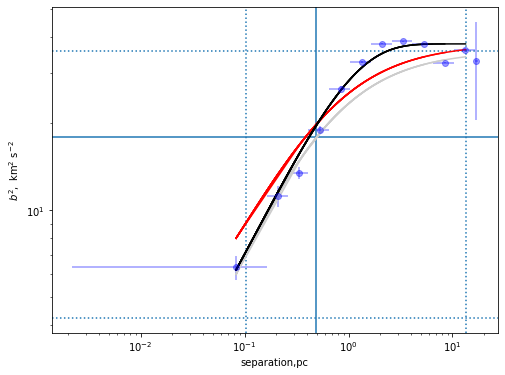

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], 2.0), color="red")
ax.plot(rgrid, bfunc03s(rgrid, r0, sig2, m, VF['s0'], 2.0), color="black")


ax.set(xscale='log', yscale='log', 
       xlabel='separation,pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m, VF['s0']

In [18]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       345.0    10.872078    3.529744     0.211978     8.192622    11.392091   
1       545.0    20.976893    2.615857    15.874459    18.865308    21.296704   
2      1537.0    32.641318    4.175150    25.128815    29.145202    32.649176   
3      3657.0    52.287290    6.691565    39.813962    46.702975    52.859737   
4      8466.0    82.719950   10.583610    63.098171    73.499849    83.241474   
5     19558.0   131.181483   16.799531   100.009860   117.023766   132.101733   
6     41364.0   206.340866   26.748312   158.501435   183.344495   206.630329   
7     81798.0   325.784786   42.202673   251.191013   289.636424   326.182646   
8    115054.0   507.245006   66.579429   398.107604   449.371869   503.439984   
9     83148.0   768.873720   96.533589   630.964145   686.845457   752.946801   
10     9341.0  1118.915011  102.643384  1000.018542  1037.023511  1091.103449   
11        9.0  1644.725897   41.476523  1588.467518  1602.436084  1652.707750   

                                    dV2                                      \
             75%          max     count       mean        std           min   
ils                                                                           
0      13.615549    15.845764     345.0   6.358022  11.359038  2.930135e-05   
1      22.955463    25.091664     545.0  11.224189  21.688361  2.850950e-05   
2      36.165933    39.802429    1537.0  13.494870  26.938574  5.390344e-07   
3      58.352033    63.087057    3657.0  19.020531  37.287256  2.558189e-07   
4      91.900381    99.997282    8466.0  26.383894  44.874475  4.507002e-08   
5     145.717643   158.486965   19558.0  32.662668  48.535672  9.909324e-10   
6     229.780871   251.183547   41364.0  37.808956  52.307755  3.265670e-08   
7     362.485188   398.103869   81798.0  38.462152  53.475364  3.801128e-11   
8     563.468657   630.956505  115054.0  37.830425  53.322159  8.889477e-09   
9     838.204338   999.996825   83148.0  32.480358  46.587439  4.886011e-08   
10   1175.828411  1582.435391    9341.0  35.906705  48.147282  2.381196e-08   
11   1674.020151  1693.387954       9.0  32.793069  36.754150  1.063508e+00   

                                                 
          25%        50%        75%         max  
ils                                              
0    0.394343   1.586594   6.548768  101.235758  
1    0.680723   3.590887  10.829879  156.818147  
2    0.925027   4.475369  14.490784  419.528815  
3    1.299873   6.324601  20.226302  656.613128  
4    1.938667   9.776235  30.601640  538.206996  
5    2.936747  13.879670  40.954659  489.073666  
6    3.807611  17.697446  50.775651  476.959145  
7    3.795937  17.462505  51.743129  639.505649  
8    3.722248  16.779725  49.751673  545.217642  
9    3.432577  14.796975  41.735757  507.702027  
10   4.654408  19.559919  48.231708  618.739704  
11   6.773583  16.116612  50.485686  105.738513

In [19]:
Car = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [20]:
f = open('SFresults\\'+ line + '.pkl',"wb")
pickle.dump(Car,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.43431830406189 seconds ---
